# 07_기계학습_2_군집화, Neural Network

# 군집화

## KMeans
- 주요 Parameter : n_clusers=5, init='k-means++' 최초 중심점 설정 방식, max_iter=300
- 주요 속성 : labels 각 데이터 포인트가 속한 군집 중심점 레이블 / cluster_centers 중심점 좌표


### 군집화 수행

- 라이브러리, 데이터 로딩

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- KMeans 수행

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF) # X

KMeans(n_clusters=3, random_state=0)

- 결과 표시

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 군집화지만 실제와 비교해봄

In [4]:
irisDF['cluster'] = kmeans.labels_ # KMeans Clustering 결과를 데이터에 붙임
irisDF['target'] = iris.target # 군집화인데 그래도 y를 붙여본다
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 새로운 데이터들에 군집 레이블링하기
- 전처리를 똑같이 해줘야한다

In [ ]:
#cluster_labels = kmeans.fit_predict(X)
#clusterDF['kmeans_label']  = cluster_labels

### 최적 군집 개수 계산

#### 성능평가 : 오차제곱합(SSE) 시각화 - 엘보우 찾기

In [ ]:
kmeans.inertia_ # 이게 SSE

78.85144142614601

- 군집 개수를 1개 ~ 10개로 비교

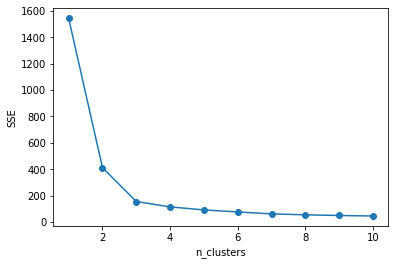

In [ ]:
def elbow(X):
    sse = [] # 오차제곱합
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker ='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(irisDF)

**해석**
- 3개일 때가 최적

#### 성능평가 : 실루엣 분석 
- 수치가 높을 수록 좋은 것 (0~1)
- cluster 개수 2개~10개에 따른 실루엣 계수 확인

In [6]:
X = irisDF.iloc[:,0:4]

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score

def sil(X):
    si = [] # 실루엣계수
    for i in range(2,11): # cluster가 2개인것 부터 10개까지!!!!
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        si.append(silhouette_score(X, km.labels_))
    print(np.round(si,3))
sil(X)

[0.681 0.553 0.498 0.493 0.365 0.357 0.362 0.349 0.331]


- 이건 k 개수 하나 찍어서 KMeans 수행하고, 그 결과 'cluster'로 실루엣 상세 확인하는 법

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 모든 데이터의 평균 실루엣 계수값을 구함. --> 이게 대표값이라 해야하나, 평균 실루엣 계수 값
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.  --> 데이터 각 행별 실루엣 계수값
score_samples = silhouette_samples(iris.data, irisDF['cluster']) # (X, KMeans 결과)
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 군집별 실루엣 계수
irisDF.groupby('cluster')['silhouette_coeff'].mean()

붓꽃 데이터셋 Silhouette Analysis Score:0.553
silhouette_samples( ) return 값의 shape (150,)


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [12]:
# 데이터 각각의 실루엣 계수
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0,0.852955
1,4.9,3.0,1.4,0.2,1,0,0.815495
2,4.7,3.2,1.3,0.2,1,0,0.829315
3,4.6,3.1,1.5,0.2,1,0,0.805014
4,5.0,3.6,1.4,0.2,1,0,0.849302


### 군집화 결과 시각화 수행
- 데이터의 변수가 4개라 PCA를 통해 2개 요소로 줄여서 산점도 구현

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,0.852955,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,0.815495,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,0.829315,-2.888991,-0.144949


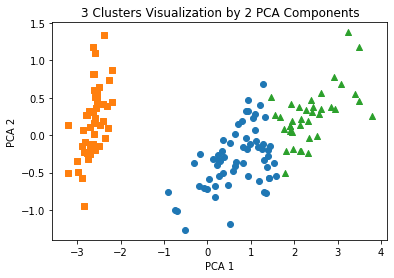

In [14]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음. 개별 군집별로 적당히 거리를 유지하면서 군집 내의 데이터가 서로 뭉쳐있을 대 적절한 군집 개수 설정되었다고 판단.
- 실루엣계수를 시각화 해서 평가하는데 도움이 될 수 있음
  - 시각화했을 때, 군집별 실루엣계수가 평균 실루엣계수보다 높고 군집별로 실루엣계수가 비슷하면 좋은 군집
- 데이터가 너무 클 때는 계산량이 매우 증가함. 이 경우 데이터 샘플링해서 평가하는 방안 고민하기

In [9]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

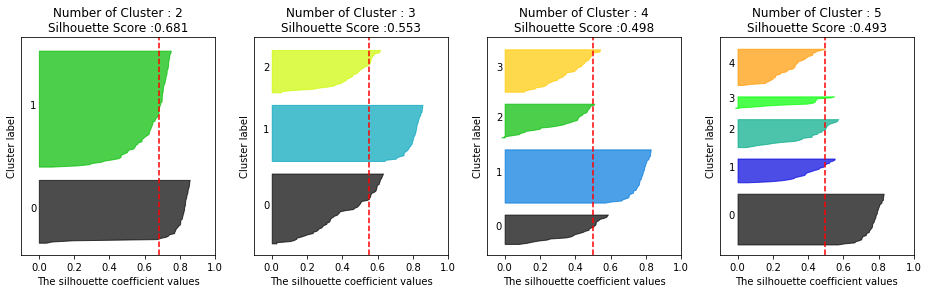

In [10]:
visualize_silhouette([2,3,4,5], X)

## 평균 이동 (Mean Shift)
- 컴퓨터 비전, 이미지/영상 인식 등에 주로 사용
- KMeans는 데이터의 평균 거리 중심으로 이동하는 반면, 평균 이동은 중심이 데이터 밀도가 높은 곳으로 이동 시킴
- 군집 중심점을 찾기 위해 확률밀도함수를 이용함
  - 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정.
  - KDE(Kernel Density Estimation)으로 확률 밀도 함수 찾음
  1. 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력
  2. KDE함수 반환값을 현재 위치에서 업데이트하면서 이동
  3. 반복해서 데이터 군집 중심점 찾아냄
- 군집의 개수 지정이 필요 없음, 대신 대역폭(bandwidth)의 값을 지정함
  - 대역폭: KDE 형태를 Smoothing하는데 적용. 값이 작으면 그래프모양이 좁고 뾰족, 오버피팅되기 쉬움. 값이 크면 넓고 부드러움, 과소적합하기 쉬움.
  - 대역폭이 클수록 적은 군집 중심점을 가지고, 작을수록 큰 군집 중심점을 가짐.

- 데이터 세트의 형태를 가정하지 않아 유연한 군집화 가능.
- 이상치의 영향력 크지 않고 미리 군집 개수 정할 필요 없음
-단, 알고리즘 수행 시간 오래 걸리고 bandwidth 크기에 따른 영향이 매우 큼

- 라이브러리 로딩 및 데이터 생성

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

- 최적 bandwidth 개수 찾기

In [20]:
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.25)
print('bandwidth 값:', round(best_bandwidth, 3))

bandwidth 값: 1.689


- 평균 이동 군집화 시행

In [21]:
# bandwidth = 1의 평균 이동 군집 --> label 3개
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [22]:
cluster_labels[:20]

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1])

* 군집화 시각화

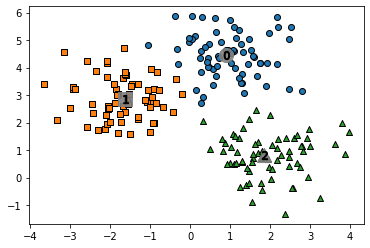

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF['meanshift_label'] = cluster_labels

centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)

plt.show()

## GMM 군집화 (Gaussian Mixture Model)
- 데이터가 여러 개의 가우시안 분포가 섞인 것으로 간주
  - 가우시안 분포(정규 분포): 평균 mu를 중심으로 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 95.45% 가지고 있음. 평균이 0이고, 표준편차가 1이면 표준 정규 분포라고 함.
- 데이터 세트를 이루는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정
  - 모수 추정: 개별 정규 분포의 평균과 분산 / 각 데이터가 어떤 정규 분포에 해당되는지 확률
  - EM(Expectation and Maximization) 방법으로 모수 추정
- KMeans는 거리 기반 군집화인 반면, GMM은 확률 기반 군집화임
- 주요 파라미터 : n_components=3 섞인 정규분포의 개수가 3개라는 뜻
- KMeans보다 유연하게 데이터에 적용되지만 시간이 오래 걸림

In [26]:
irisDF['target'] = iris.target

In [27]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data) # X 투입(군집화니까 y는 없을 수도 있음)
gmm_cluster_labels = gmm.predict(iris.data) # 결과를 뱉어줌

In [28]:
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target에 따라 gmm_cluster 값 매핑 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()

In [29]:
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

In [ ]:
kmeans = KMeans

## DBSCAN 밀도 기반 군집화
- 주요 파라미터 : eps 입실론 주변 영역의 반경 / min_samples 핵심 포인트가 되기 위한 최소 데이터 수

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

# 결과 붙여서 실제 y와 비교해보기
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

## 병합 군집 Hierarchical Clustering

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score

k_set = range(2,10)
names = []
models = []
results = []
silhouette_scores = []
mutual_scores = []
for k in k_set:
    # Add model name
    names.append('HC_k=%d' % k)
    
    # Call model
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', 
                                    linkage='ward')
    
    # Get cluster IDs 
    result = model.fit_predict(X)
    
    models.append(model)
    results.append(result)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, result, metric='euclidean'))

    # Calculate mutual_information
    mutual_scores.append(adjusted_mutual_info_score(Y, result))

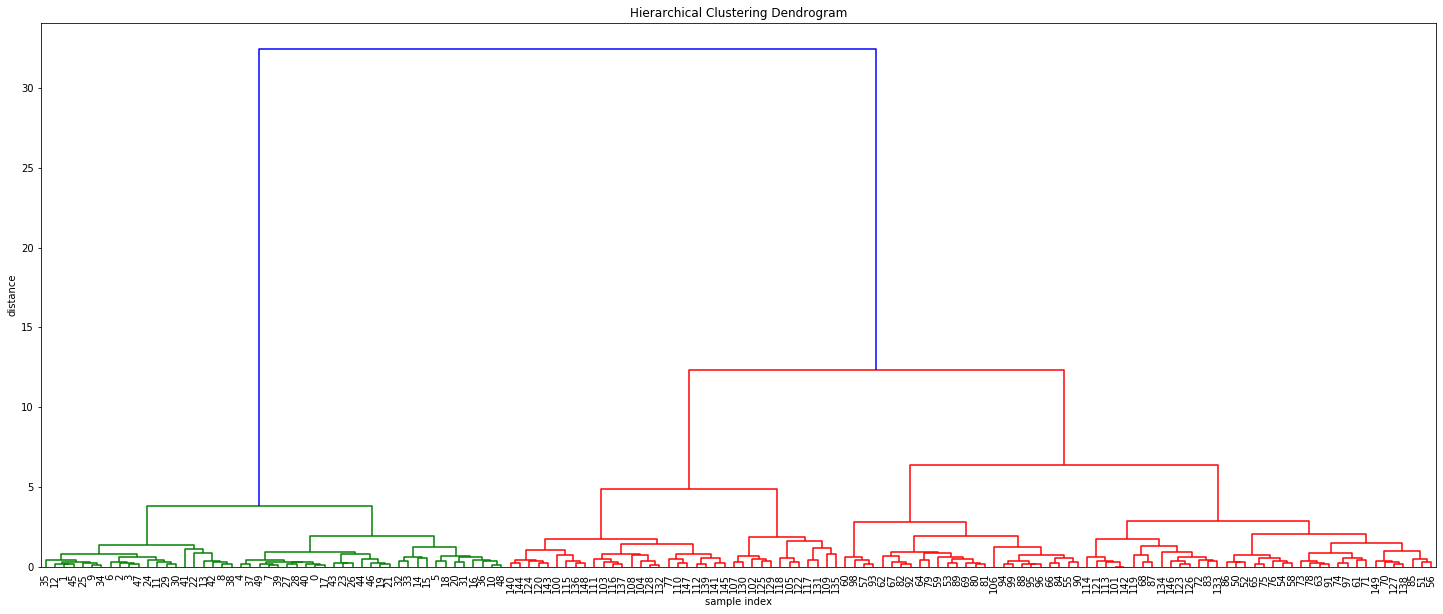

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(X, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10,  # font size for the x axis labels
    
)
plt.show()

# 인공 신경망 NN Neural Network

## MLP ; Feed-forward network a.k.a. Multi-layer perceptron

### MLP Regressor

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, random_state=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([-0.98506347, -7.19854141])

In [ ]:
# R^2 score
regr.score(X_test, y_test)

0.4162338898076593

In [ ]:
regr.get_params

<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)>

### MLP Classifier

- 데이터 로딩

In [ ]:
import pandas as pd

dataset.head()

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
from sklearn import model_selection
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
test_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [ ]:
Y[:20]

array([2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 4., 4., 2.,
       2., 4., 2.])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(546, 9)
(137, 9)


In [ ]:
from sklearn.neural_network import MLPClassifier

# MLPClassifier는 NN을 학습하는 함수
# 활성함수는 relu가 default

clf = MLPClassifier(hidden_layer_sizes=(9, 9), # 은닉층 9개, 9개로 두 층
                    learning_rate_init=0.005,
                    max_iter=300,
                    random_state=1234,
                    verbose=1) # verbose는 학습이 되고 있는 과정을 프린트 해 줌

In [ ]:
clf.fit(X_train, Y_train)

In [ ]:
Y_train_hat = clf.predict(X_train)
Y_test_hat = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_train, Y_train_hat))

              precision    recall  f1-score   support

         2.0       0.98      0.98      0.98       363
         4.0       0.97      0.96      0.96       183

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546



In [ ]:
print(metrics.classification_report(Y_test, Y_test_hat))

              precision    recall  f1-score   support

         2.0       0.91      0.99      0.95        81
         4.0       0.98      0.86      0.91        56

    accuracy                           0.93       137
   macro avg       0.94      0.92      0.93       137
weighted avg       0.94      0.93      0.93       137



#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'activation': ['logistic', 'tanh', 'relu'], # 활성함수 종류
    'hidden_layer_sizes': [(9,), (9, 9)]
}

In [ ]:
gridsearch = GridSearchCV(estimator=MLPClassifier(max_iter=300),
                          param_grid=params,
                          cv=5,
                          verbose=1, n_jobs = -1) # n_jobs는 일을 집중하게 해서 빨리 돌리는 것

In [ ]:
gridsearch.fit(X_train, Y_train)
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers. 4개로 돌린다고 나옴

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=300,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],

In [ ]:
gridsearch.cv_results_

{'mean_fit_time': array([0.48829389, 0.5722693 , 0.37898817, 1.09467344, 0.65085807,
        0.63450246]),
 'std_fit_time': array([0.04423327, 0.00881731, 0.01072013, 0.16678837, 0.11706204,
        0.0238731 ]),
 'mean_score_time': array([0.0012023 , 0.00039887, 0.00039716, 0.00059805, 0.00060086,
        0.00060015]),
 'std_score_time': array([0.00146538, 0.00048852, 0.00048643, 0.00048831, 0.00049063,
        0.00049002]),
 'param_activation': masked_array(data=['logistic', 'logistic', 'tanh', 'tanh', 'relu', 'relu'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(9,), (9, 9), (9,), (9, 9), (9,), (9, 9)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'logistic', 'hidden_layer_sizes': (9,)},
  {'activation': 'logistic', 'hidden_layer_sizes': (9, 9)},
  {'activation': 'tanh',

In [ ]:
gridsearch.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (9, 9)}

In [ ]:
gridsearch.best_score_

0.9633699633699634

In [ ]:
gridsearch.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9, 9), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
Y_train_hat = gridsearch.predict(X_train)
Y_test_hat = gridsearch.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_train, Y_train_hat))

              precision    recall  f1-score   support

         2.0       0.99      0.98      0.98       363
         4.0       0.96      0.97      0.96       183

    accuracy                           0.98       546
   macro avg       0.97      0.98      0.97       546
weighted avg       0.98      0.98      0.98       546



In [ ]:
print(metrics.classification_report(Y_test, Y_test_hat))

              precision    recall  f1-score   support

         2.0       0.96      0.98      0.97        81
         4.0       0.96      0.95      0.95        56

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

